# Explainable ECG Time Series Classification with LIME
This quick demo ([source](https://github.com/emanuel-metzenthin/Lime-For-Time)). It applies LIME algorithm (LIME - Local Interpretable Model-Agnostic Explanations) to time series classification. The original LIME package only supports image, text and tabular data. Therefore, LIME is extended it to be able to deal with time series data.

LIME is used to better understand predictions made by complex black-box ML models. By making use of a transparent, interpretable model the algorithm tries to approximate the black-box locally in vicinity of a specific data sample. A given example instance is perturbed (e.g., parts of its features are 'switched off', pixels greyed out) many times and fed to the black-box. The approximating model then learns which features have the most influence on the final prediction.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as acc
import numpy as np
from lime import explanation
from lime import lime_base
import math
from lime_timeseries import LimeTimeSeriesExplainer

### Loading ECG dataset

In [3]:
ecg_train = pd.read_csv('data/ecg_test.csv', sep=',', header=None).astype(float)
ecg_train.replace([np.inf, -np.inf], np.nan).dropna()
ecg_train = ecg_train.loc[:186, :]
ecg_train_y = ecg_train.loc[:, 0]
ecg_train_x = ecg_train.loc[:, 1:]
ecg_test = pd.read_csv('data/ecg_train.csv', sep=',', header=None).astype(float)
ecg_test.replace([np.inf, -np.inf], np.nan).dropna()
ecg_test_y = ecg_test.loc[:, 0]
ecg_test_x = ecg_test.loc[:, 1:]

### Exploratory analysis

Let's plot the two time series datasets using different colors for each class.

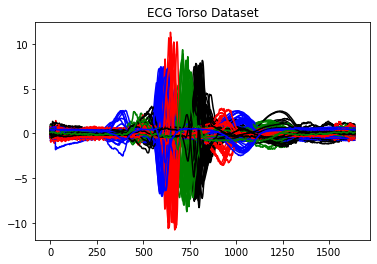

In [4]:
for idx in range(0, len(ecg_train)):
    if ecg_train_y[idx] == 4:
        plt.plot(ecg_train_x.loc[idx, :], 'b')
    elif ecg_train_y[idx] == 1:
        plt.plot(ecg_train_x.loc[idx, :], 'r')
    elif ecg_train_y[idx] == 2:
        plt.plot(ecg_train_x.loc[idx, :], 'g')
    elif ecg_train_y[idx] == 3:
        plt.plot(ecg_train_x.loc[idx, :], 'black')
plt.title('ECG Torso Dataset')
plt.show()

### Evaluation

We train a kNN classifier on that data and print the accuracy. We want to explain this classifier using LIME.

In [5]:
knn2 = KNN()
knn2.fit(ecg_train_x, ecg_train_y)
print('Accuracy KNN for earthquake dataset: %f' % (acc(ecg_test_y, knn2.predict(ecg_test_x))))

Accuracy KNN for earthquake dataset: 0.900000


### Explaining ECG Dataset
Let's plot the relevant slices in our time series. Highlighted depending on their impact on the classification result.

In [6]:
idx_ecg = 11 # explained instance
num_features_ecg = 5 # how many feature contained in explanation
num_slices_ecg = 17 # split time series
series_ecg = ecg_test_x.iloc[idx_ecg, :]

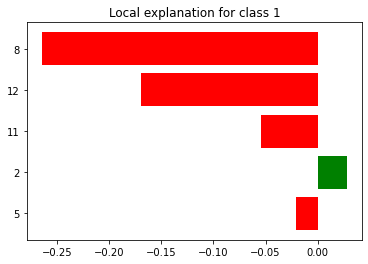

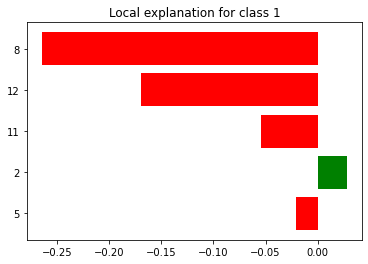

In [7]:
explainer2 = LimeTimeSeriesExplainer()
exp2 = explainer2.explain_instance(series_ecg, knn2.predict_proba, num_features=num_features_ecg, num_samples=500, num_slices=num_slices_ecg, 
                                 replacement_method='noise')
exp2.as_pyplot_figure()

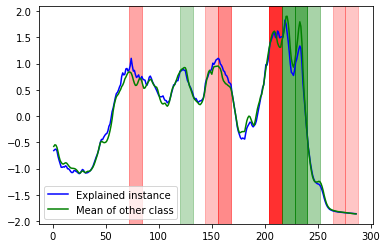

In [9]:
values_per_slice = math.ceil(len(series) / num_slices)
plt.plot(series, color='b', label='Explained instance')
plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower left')

for i in range(num_features):
    feature, weight = exp.as_list()[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    color = 'red' if weight < 0 else 'green' 
    plt.axvspan(start , end, color=color, alpha=abs(weight*2))
plt.show()